# Cleaning the ACS Files
#### Jameson Carter
#### 11/21/2021
The following file evaluates the ACS shapefiles that we have generated using 1_getACS.py. We check for missing values, makes some basic plots evaluating the data across the city, and perform other basic checks. Additionally, we pare the dataset down to only contain results from the city of Chicago.

The dataset ACSData contains all of the Census tracts for Cook County, and 5 year averages for a variety of demographic and other variables. These variables were selected using the data profiles variables presented on this site: https://api.census.gov/data/2019/acs/acs5/profile/variables.html

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import wkt

from pyprojroot import here

In [2]:
ACSData = pd.read_csv(here('./data/raw/ACSFile.csv'))
ChicagoTracts = pd.read_csv(here('./data/raw/ChicagoCensusTractsTIGER2010.csv'))

In [3]:
# Create tract field for chicago tracts in ACS extract
ACSData['GEOID10'] = ACSData['geo_id'].str[9:] 
ChicagoTracts['GEOID10'] = ChicagoTracts['GEOID10'].astype(str)

In [4]:
# Now only get the ACS Data fields for Tracts established in Chicago for the 2010 Census
# https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik
ACSData = ACSData[ACSData['GEOID10'].isin(list(ChicagoTracts['GEOID10']))]

### Evaluating Tracts with Missing Data

There appear to be a number of tracts missing data, per the following code. We need to decide what to do with these tracts. The decisions made here are important, as we are analyzing our target variable (complaints) at the tract-level.

In [5]:
ACSData.isnull().sum()

geo_id         0
DP02_0002PE    3
DP02_0004PE    3
DP02_0006PE    3
DP02_0010PE    3
              ..
DP05_0044PE    3
DP05_0058PE    3
DP05_0071PE    3
geometry       0
GEOID10        0
Length: 101, dtype: int64

The following code evaluates where these tracts with missing data are located. It appears that there are a fair number of tracts missing at least 1 variable. Additionally, there is some clustered missingness in the East.

<AxesSubplot:>

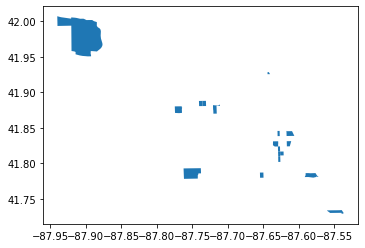

In [6]:
ACSDataNulls = ACSData[ACSData.isna().any(axis=1)].copy()

ACSDataNulls['geometry'] = gpd.GeoSeries.from_wkt(ACSDataNulls['geometry'])
ACSGeoDataNull = gpd.GeoDataFrame(ACSDataNulls, geometry='geometry')
ACSGeoDataNull.plot()

In [7]:
# geo_id 1400000US17031980000, 1400000US17031980100, and 1400000US17031381700 appear to be completely null
ACSGeoDataNull

,geo_id,DP02_0002PE,DP02_0004PE,DP02_0006PE,DP02_0010PE,DP02_0014PE,DP02_0015PE,DP02_0016E,DP02_0017E,DP02_0022PE,...,DP05_0018E,DP05_0019PE,DP05_0024PE,DP05_0037PE,DP05_0038PE,DP05_0044PE,DP05_0058PE,DP05_0071PE,geometry,GEOID10
109,1400000US17031070103,13.1,11.4,32.5,43.0,2.8,6.7,1.33,2.35,3.7,...,27.4,3.7,5.1,81.2,3.9,10.6,1.7,9.2,"MULTIPOLYGON (((-87.64422 41.92805, -87.64223 ...",17031070103
329,1400000US17031252101,17.6,1.5,35.6,45.2,17.5,30.8,1.95,3.14,19.8,...,48.4,17.6,22.5,2.4,97.6,0.0,0.0,0.9,"MULTIPOLYGON (((-87.77466 41.88015, -87.76976 ...",17031252101
335,1400000US17031260300,15.4,9.9,27.4,47.3,24.6,21.9,2.90,4.10,43.6,...,31.0,29.6,8.5,3.1,91.0,0.0,0.0,7.6,"MULTIPOLYGON (((-87.73571 41.88788, -87.73079 ...",17031260300
336,1400000US17031260400,8.4,6.9,31.4,53.3,52.1,36.1,2.88,3.45,32.4,...,29.0,31.4,14.7,1.0,99.0,0.0,0.0,0.0,"MULTIPOLYGON (((-87.74061 41.88781, -87.73571 ...",17031260400
343,1400000US17031270500,13.8,5.5,13.3,67.3,28.6,26.8,2.35,3.53,36.1,...,32.6,22.1,11.8,0.4,94.7,0.0,0.0,6.1,"MULTIPOLYGON (((-87.72082 41.88190, -87.71384 ...",17031270500
394,1400000US17031340600,1.9,6.3,19.5,72.3,34.2,38.6,2.36,3.52,45.7,...,26.9,34.4,16.4,1.0,97.6,0.0,1.4,0.0,"MULTIPOLYGON (((-87.63625 41.83088, -87.63262 ...",17031340600
395,1400000US17031350100,15.5,3.3,36.3,44.9,7.1,14.3,1.59,2.56,6.5,...,29.8,5.4,9.5,8.9,36.8,45.7,5.4,2.8,"MULTIPOLYGON (((-87.61730 41.84567, -87.61624 ...",17031350100
396,1400000US17031350400,6.7,2.2,20.4,70.7,47.6,7.1,2.94,3.87,54.3,...,23.0,42.1,2.7,0.5,99.5,0.0,0.0,0.0,"MULTIPOLYGON (((-87.62995 41.84554, -87.62917 ...",17031350400
398,1400000US17031351100,6.9,2.8,13.2,77.1,58.8,12.1,2.57,2.98,51.1,...,19.8,47.6,5.3,1.8,96.3,0.0,1.9,0.8,"MULTIPOLYGON (((-87.61697 41.83110, -87.61448 ...",17031351100
404,1400000US17031380500,0.0,6.4,5.2,88.4,57.3,25.9,2.61,3.25,49.2,...,24.9,38.6,9.9,0.0,100.0,0.0,0.0,0.0,"MULTIPOLYGON (((-87.62936 41.82368, -87.62897 ...",17031380500


The above exploration finds that there are 3 tracts with completely null observations, while there are 15 others that have mostly complete information. We would like to keep these tracts in the model and are willing to part with variables to do so. The next chunk finds that these variables are NaN for at least one of the 15 tracts of interest (i.e. tracts that seem to have mostly complete data):
##### 1. DP03_0017PE
Percentage of owner occupied units without a mortgage
##### 2. DP03_0025E
Average travel time to work     
##### 3. DP04_0048E
Average household size of owner-occupied units    
##### 4. DP04_0089E
Median value of owner-occupied units   
##### 5. DP04_0091PE
Percentage of owner occupied units with a mortgage 
##### 6. DP04_0092PE
Percentage of owner occupied units without a mortgage   

I am guessing these variables were suppressed to protect confidentiality of respondents. I do not feel comfortable imputing the value of these variables because census tracts vary widely in their essential characteristics (geographic area, sometimes population), so instead we delete these variables and include those 15 tracts in the dataset. Additionally, the variables in question do not seem particularly compelling to begin with.

In [8]:
ACSGeoDataNull2 = ACSGeoDataNull[~ACSGeoDataNull['geo_id'].isin(['1400000US17031980000', 
                                                                '1400000US17031980100', 
                                                                '1400000US17031381700'])]
nullcols = ACSGeoDataNull2.isnull().sum()>0
nullcols.loc[nullcols == True] # Which variables are missing at least once?

DP03_0017PE    True
DP03_0025E     True
DP04_0048E     True
DP04_0089E     True
DP04_0091PE    True
DP04_0092PE    True
dtype: bool

In [9]:
ACSData = ACSData.drop(['DP03_0017PE', 'DP03_0025E', 'DP04_0048E', 
                       'DP04_0089E', 'DP04_0091PE', 'DP04_0092PE'],
                        axis = 1)
ACSData = ACSData.dropna()
print(f'After dropping Nulls and columns with only a few nulls, the dataset had {len(ACSData)} observations')

After dropping Nulls and columns with only a few nulls, the dataset had 798 observations


<AxesSubplot:>

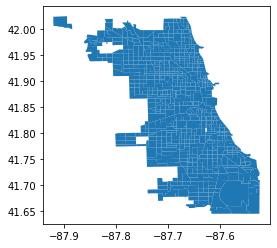

In [10]:
ACSData['geometry'] = gpd.GeoSeries.from_wkt(ACSData['geometry'])
ACSGeoData = gpd.GeoDataFrame(ACSData, geometry='geometry')
ACSGeoData.plot()

In [11]:
ACSGeoData.to_csv(here('./data/CleanACSFile.csv'), 
                         encoding='utf-8', index=False)